In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from itertools import product
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data.csv')
data = data.dropna()
data.head()

,id,pm01,pm25,pm10,temperature,humidity,event
0,4222,23,54,72,24.0,89.0,2023-02-15 14:08:59
1,4223,19,45,54,24.0,88.0,2023-02-15 14:10:59
2,4224,22,53,81,24.0,87.0,2023-02-15 14:13:00
3,4225,26,58,64,24.0,87.0,2023-02-15 14:15:00
4,4226,24,58,83,24.0,86.0,2023-02-15 14:17:01


In [4]:
data.tail()

,id,pm01,pm25,pm10,temperature,humidity,event
27940,32162,24,162,166,33.4,66.5,2023-11-02 16:02:17
27941,32163,39,166,170,33.3,62.9,2023-11-02 16:17:17
27942,32164,14,169,177,33.2,69.5,2023-11-02 16:32:17
27943,32165,4,164,168,32.8,70.9,2023-11-02 16:47:17
27944,32166,14,23,31,32.6,72.1,2023-11-02 17:02:17


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27906 entries, 0 to 27944
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           27906 non-null  int64  
 1   pm01         27906 non-null  int64  
 2   pm25         27906 non-null  int64  
 3   pm10         27906 non-null  int64  
 4   temperature  27906 non-null  float64
 5   humidity     27906 non-null  float64
 6   event        27906 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 1.7+ MB


In [6]:
data['Date'] = pd.to_datetime(data['event'])

In [7]:
data.head()

,id,pm01,pm25,pm10,temperature,humidity,event,Date
0,4222,23,54,72,24.0,89.0,2023-02-15 14:08:59,2023-02-15 14:08:59
1,4223,19,45,54,24.0,88.0,2023-02-15 14:10:59,2023-02-15 14:10:59
2,4224,22,53,81,24.0,87.0,2023-02-15 14:13:00,2023-02-15 14:13:00
3,4225,26,58,64,24.0,87.0,2023-02-15 14:15:00,2023-02-15 14:15:00
4,4226,24,58,83,24.0,86.0,2023-02-15 14:17:01,2023-02-15 14:17:01


In [8]:
data = data.set_index('Date')

In [9]:
data.head()

,id,pm01,pm25,pm10,temperature,humidity,event
Date,,,,,,,
2023-02-15 14:08:59,4222,23,54,72,24.0,89.0,2023-02-15 14:08:59
2023-02-15 14:10:59,4223,19,45,54,24.0,88.0,2023-02-15 14:10:59
2023-02-15 14:13:00,4224,22,53,81,24.0,87.0,2023-02-15 14:13:00
2023-02-15 14:15:00,4225,26,58,64,24.0,87.0,2023-02-15 14:15:00
2023-02-15 14:17:01,4226,24,58,83,24.0,86.0,2023-02-15 14:17:01


In [20]:
data = data.sort_index()

In [21]:
start_date = '2023-05-01 00:00:00'

In [52]:
end_date = '2023-08-31 23:59:59'

In [53]:
selected_data = data[start_date:end_date]

In [54]:
series_data = selected_data['pm25']

In [55]:
series_data.head()

Date
2023-05-01 00:13:50    14
2023-05-01 00:28:50    13
2023-05-01 00:43:50    18
2023-05-01 00:58:51    16
2023-05-01 01:13:51    16
Name: pm25, dtype: int64

In [43]:
series_data.tail()

Date
2023-09-30 22:58:19    13
2023-09-30 23:13:19     9
2023-09-30 23:28:19    15
2023-09-30 23:43:19    11
2023-09-30 23:58:19    10
Name: pm25, dtype: int64

In [44]:
data_uniforme = series_data.asfreq('15T', method='pad')

In [45]:
daily_data = data_uniforme.resample('D').mean()


In [46]:
daily_data.head()

Date
2023-05-01    13.802083
2023-05-02    17.385417
2023-05-03    15.718750
2023-05-04    15.458333
2023-05-05    22.562500
Freq: D, Name: pm25, dtype: float64

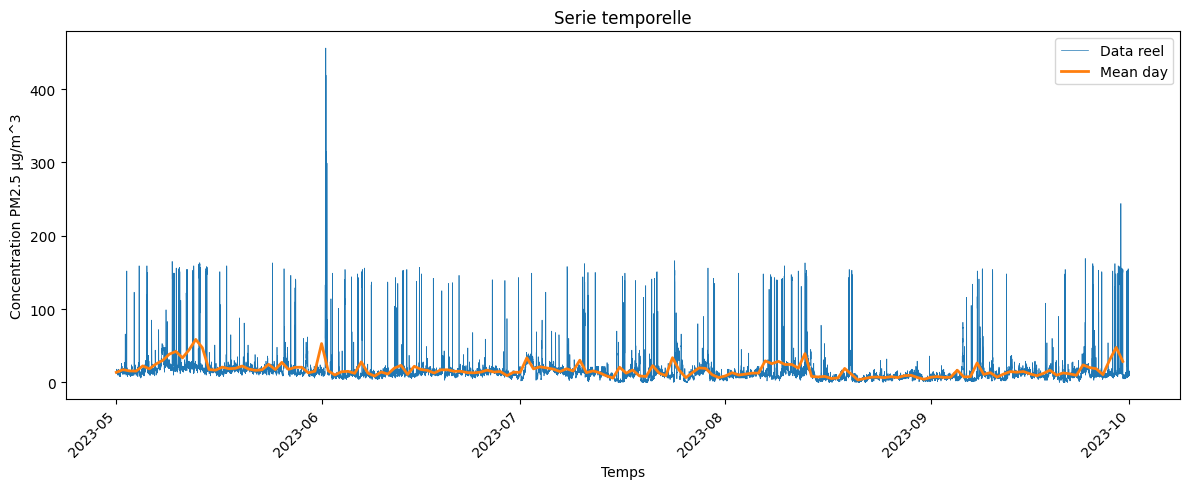

In [47]:
plt.figure(figsize=(12, 5))
data_uniforme.plot(label='Data reel', linewidth=0.5)
daily_data.plot(label='Mean day', linewidth=2)

plt.xlabel('Temps')
plt.ylabel('Concentration PM2.5 µg/m^3')
plt.title('Serie temporelle')
plt.legend()
plt.savefig('serie temporelle')
plt.xticks(rotation=45)  # Inclinaison des étiquettes pour une meilleure lisibilité
plt.tight_layout()

Dickey-Fuller test results :
Statistique  test: -3.233866653404277
p-value: 0.018106152357234093
Lags used: 6
Number of observations used: 146
Critical values :
	1%: -3.476
	5%: -2.882
	10%: -2.577
Time series is stationary at 95% confidence level.


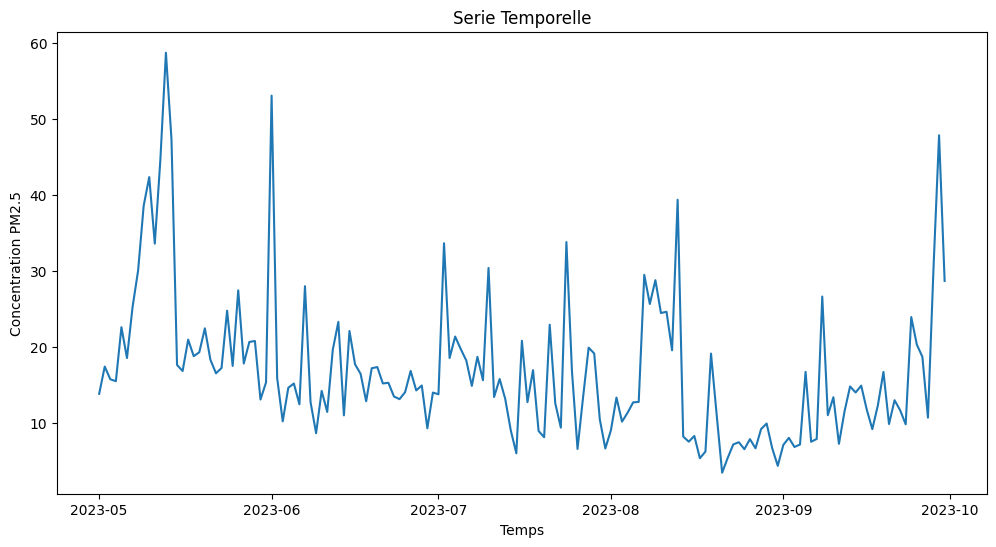

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Fonction pour effectuer le test de Dickey-Fuller augmenté
def test_stationarity(timeseries):
    # Calcul de la statistique du test de Dickey-Fuller augmenté
    result = adfuller(timeseries, autolag='AIC')
    print('Dickey-Fuller test results :')
    print('Statistique  test:', result[0])
    print('p-value:', result[1])
    print('Lags used:', result[2])
    print('Number of observations used:', result[3])
    print('Critical values :')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    # Comparaison de la statistique du test avec les valeurs critiques
    if result[1] <= 0.05:
        print("Time series is stationary at 95% confidence level.")
    else:
        print("The time series is not stationary.")

# Appeler la fonction pour effectuer le test de Dickey-Fuller augmenté
test_stationarity(daily_data) #daily_data data_uniforme

# Afficher le graphique de la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(daily_data)
plt.title('Serie Temporelle')
plt.xlabel('Temps')
plt.ylabel('Concentration PM2.5')

#plt.savefig('stationarity.png')  # Enregistrer le graphique sous forme d'image

plt.show()

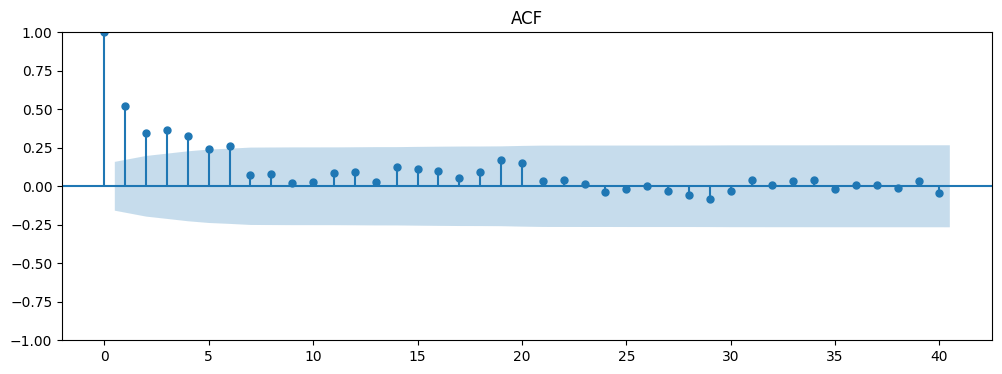

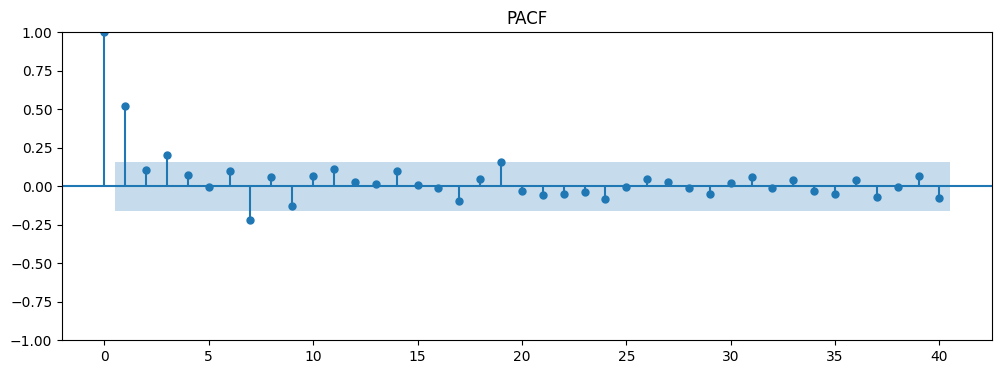

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Afficher l'ACF (Auto-Correlation Function) pour déterminer q (ordre du composant MA)
plt.figure(figsize=(12, 4))
plot_acf(daily_data, lags=40, ax=plt.gca())  # Réglez le nombre de lags en conséquence
plt.title('ACF')
#plt.savefig('ACF.png')  # Enregistrer le graphique sous forme d'image

plt.show()

# Afficher le PACF (Partial Auto-Correlation Function) pour déterminer p (ordre du composant AR)
plt.figure(figsize=(12, 4))
plot_pacf(daily_data, lags=40, ax=plt.gca())  # Réglez le nombre de lags en conséquence
plt.title('PACF')
#plt.savefig('PACF.png')  # Enregistrer le graphique sous forme d'image

plt.show()


In [60]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
from statsmodels.tsa.arima.model import ARIMA

# Créer un modèle ARIMA(2,1,1)
model = ARIMA(daily_data, order=(1,0,3))

# Ajuster le modèle
model_fit = model.fit()

# Afficher le résumé du modèle
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   pm25   No. Observations:                  153
Model:                 ARIMA(1, 1, 8)   Log Likelihood                -526.034
Date:                Thu, 02 Nov 2023   AIC                           1072.068
Time:                        18:20:41   BIC                           1102.307
Sample:                    05-01-2023   HQIC                          1084.353
                         - 09-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1262      1.159      0.109      0.913      -2.145       2.397
ma.L1         -0.6745      1.151     -0.586      0.558      -2.930       1.581
ma.L2         -0.1899      0.646     -0.294      0.7

In [ ]:
model_fit.summary()